In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)
%matplotlib inline

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

In [3]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([8, 6, 5, 9, 4, 1, 2, 3, 0]), tensor([10,  7]))

In [4]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [5]:
linear_model = nn.Linear(1, 1)
linear_model(t_un_val)

tensor([[3.0894],
        [1.0605]], grad_fn=<AddmmBackward0>)

In [6]:
linear_model.weight

Parameter containing:
tensor([[0.4354]], requires_grad=True)

In [7]:
linear_model.bias

Parameter containing:
tensor([0.1114], requires_grad=True)

In [8]:
x = torch.ones(1)
linear_model(x)

tensor([0.5468], grad_fn=<ViewBackward0>)

In [9]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468],
        [0.5468]], grad_fn=<AddmmBackward0>)

In [10]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(
    linear_model.parameters(),
    lr=1e-2,
)

/home/artem/micromamba/envs/ml/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [11]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val, t_c_train, t_c_val):
    for epoch in range(n_epochs):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        print(f"Epoch: {epoch+1}: Train loss: {loss_train} Valid loss: {loss_val}")

In [12]:
training_loop(
    n_epochs=3000,
    optimizer=optimizer,
    model=linear_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val=t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val,
)

Epoch: 1: Train loss: 184.00115966796875 Valid loss: 238.3381805419922
Epoch: 2: Train loss: 48.75218963623047 Valid loss: 98.01850128173828
Epoch: 3: Train loss: 29.499080657958984 Valid loss: 72.10547637939453
Epoch: 4: Train loss: 26.718034744262695 Valid loss: 66.08155822753906
Epoch: 5: Train loss: 26.276199340820312 Valid loss: 64.25494384765625
Epoch: 6: Train loss: 26.166664123535156 Valid loss: 63.541934967041016
Epoch: 7: Train loss: 26.10441017150879 Valid loss: 63.182342529296875
Epoch: 8: Train loss: 26.04899024963379 Valid loss: 62.94672393798828
Epoch: 9: Train loss: 25.994646072387695 Valid loss: 62.75675964355469
Epoch: 10: Train loss: 25.940563201904297 Valid loss: 62.58403778076172
Epoch: 11: Train loss: 25.886632919311523 Valid loss: 62.418060302734375
Epoch: 12: Train loss: 25.832820892333984 Valid loss: 62.254859924316406
Epoch: 13: Train loss: 25.779142379760742 Valid loss: 62.092979431152344
Epoch: 14: Train loss: 25.725582122802734 Valid loss: 61.93183898925781

In [16]:
print(list(linear_model.parameters()))

[Parameter containing:
tensor([[5.4243]], requires_grad=True), Parameter containing:
tensor([-17.9264], requires_grad=True)]


In [18]:
seq_model = nn.Sequential(
    nn.Linear(1, 5),
    nn.Tanh(),
    nn.Linear(5, 1),
)
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Tanh()
  (2): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
[param.shape for param in seq_model.parameters()]

[torch.Size([5, 1]), torch.Size([5]), torch.Size([1, 5]), torch.Size([1])]

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([5, 1])
0.bias torch.Size([5])
2.weight torch.Size([1, 5])
2.bias torch.Size([1])


In [25]:
from collections import OrderedDict
seq_model = nn.Sequential(OrderedDict([
    ('Linear_Block', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1)),  
]))
seq_model

Sequential(
  (Linear_Block): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [26]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs=5_000,
    optimizer=optimizer,
    model=seq_model,
    loss_fn=nn.MSELoss(),
    t_u_train=t_un_train,
    t_u_val = t_un_val,
    t_c_train=t_c_train,
    t_c_val=t_c_val
)

Epoch: 1: Train loss: 177.65252685546875 Valid loss: 227.84193420410156
Epoch: 2: Train loss: 173.54808044433594 Valid loss: 224.47373962402344
Epoch: 3: Train loss: 169.575927734375 Valid loss: 221.2199249267578
Epoch: 4: Train loss: 165.73329162597656 Valid loss: 218.07791137695312
Epoch: 5: Train loss: 162.01712036132812 Valid loss: 215.04483032226562
Epoch: 6: Train loss: 158.42396545410156 Valid loss: 212.11766052246094
Epoch: 7: Train loss: 154.9503936767578 Valid loss: 209.29319763183594
Epoch: 8: Train loss: 151.59278869628906 Valid loss: 206.56825256347656
Epoch: 9: Train loss: 148.34751892089844 Valid loss: 203.9395751953125
Epoch: 10: Train loss: 145.2110137939453 Valid loss: 201.40408325195312
Epoch: 11: Train loss: 142.17974853515625 Valid loss: 198.9585418701172
Epoch: 12: Train loss: 139.25018310546875 Valid loss: 196.5999755859375
Epoch: 13: Train loss: 136.41897583007812 Valid loss: 194.32534790039062
Epoch: 14: Train loss: 133.6827850341797 Valid loss: 192.13175964355

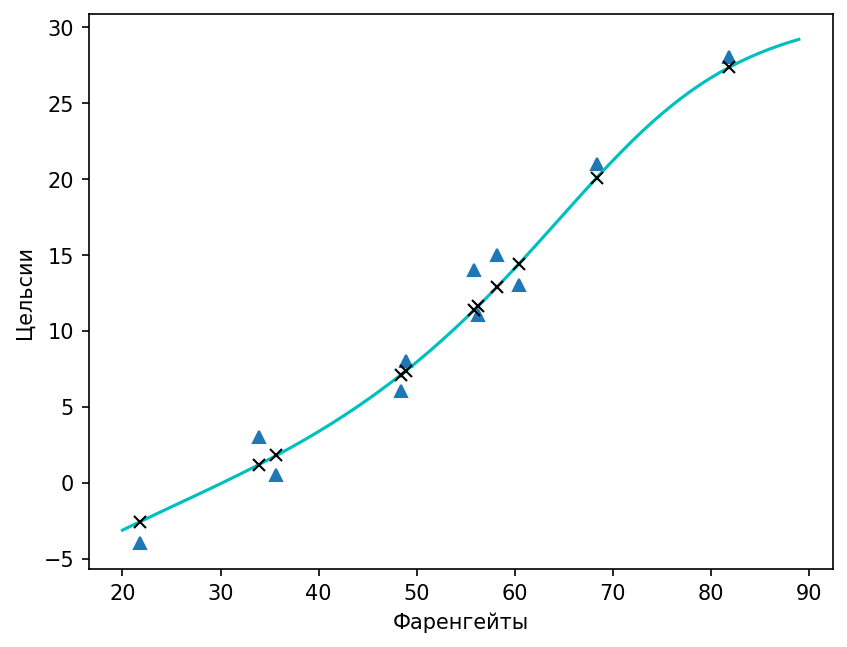

In [52]:
from matplotlib import pyplot as plt

t_range = torch.arange(20, 90).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Фаренгейты")
plt.ylabel("Цельсии")

plt.plot(t_u.numpy(), t_c.numpy(), '^')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')